<a href="https://colab.research.google.com/github/realcommang/BigDataProcess/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98/%EC%A4%91%EA%B0%84%EB%8C%80%EB%B9%84/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
start_time = time.time()

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4,3]

import seaborn as sns
color = sns.color_palette()

import matplotlib as mpl

from sklearn import preprocessing as pp
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

'''알고리즘 관련 라이브러'''
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb
# import lightgbm as lgb

In [3]:
DF = pd.read_csv('/content/drive/MyDrive/deeplearning/DeepLearningPrac/중간대비_빅데알/phbirths (1).csv')
DF.head()

,blk,edu,smk,wks,grams
0,0,0,1,40,2898
1,1,0,1,26,994
2,0,2,0,38,3977
3,0,2,1,37,3040
4,0,2,0,38,3523


In [4]:
DF = DF.rename(columns={'grams':'y'}) #열 이름을 grams에서 y로 바꿈
DF.info() #데이터프레임의 정보를 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   blk     1115 non-null   int64
 1   edu     1115 non-null   int64
 2   smk     1115 non-null   int64
 3   wks     1115 non-null   int64
 4   y       1115 non-null   int64
dtypes: int64(5)
memory usage: 43.7 KB


In [5]:
#변수별 결측개수 : 결측 없음
nmiss = DF.isna().sum()
nmiss

blk    0
edu    0
smk    0
wks    0
y      0
dtype: int64

In [6]:
#DataFrame 의 각 열에서 서로 다른 값의 수를 계산
ndistinct = DF.apply(lambda x : len(x.unique())) #DF각 열의 고유값 수 를 계산한다
ndistinct

blk      2
edu     15
smk      2
wks     23
y      371
dtype: int64

In [7]:
DF.shape #크기

(1115, 5)

In [8]:
DF.columns #변수이름

Index(['blk', 'edu', 'smk', 'wks', 'y'], dtype='object')

In [9]:
DF.index #인덱스

RangeIndex(start=0, stop=1115, step=1)

In [10]:
DF.head()

,blk,edu,smk,wks,y
0,0,0,1,40,2898
1,1,0,1,26,994
2,0,2,0,38,3977
3,0,2,1,37,3040
4,0,2,0,38,3523


In [11]:
DF.describe().round(3) #데이터프레임의 숫자형 열에 대한 요약 통계를 계산한 후에 그 결과를 소수점 세자리까지 반올림
#열의 수, 평균, 표준편차, 최소값, 25%, 50%, 75%, 최대값 포함

,blk,edu,smk,wks,y
count,1115.000,1115.000,1115.000,1115.000,1115.000
mean,0.594,12.266,0.241,38.841,3219.536
std,0.491,2.097,0.428,2.672,633.518
min,0.000,0.000,0.000,20.000,284.000
25%,0.000,11.000,0.000,38.000,2900.000
50%,1.000,12.000,0.000,39.000,3267.000
75%,1.000,13.000,0.000,40.000,3630.000
max,1.000,17.000,1.000,43.000,4830.000


In [12]:
DF.groupby('blk')[['edu', 'wks', 'y']].describe().T

blk                  0            1
edu count   453.000000   662.000000
    mean     12.635762    12.013595
    std       2.384918     1.833821
    min       0.000000     0.000000
    25%      12.000000    11.000000
    50%      12.000000    12.000000
    75%      14.000000    12.000000
    max      17.000000    17.000000
wks count   453.000000   662.000000
    mean     39.401766    38.457704
    std       2.017007     2.981617
    min      20.000000    20.000000
    25%      39.000000    38.000000
    50%      40.000000    39.000000
    75%      40.000000    40.000000
    max      43.000000    43.000000
y   count   453.000000   662.000000
    mean   3415.860927  3085.193353
    std     572.352992   638.668792
    min     410.000000   284.000000
    25%    3097.000000  2813.000000
    50%    3494.000000  3157.500000
    75%    3779.000000  3477.500000
    max    4830.000000  4830.000000

In [13]:
DF.groupby('blk')[['edu', 'wks', 'y']].describe()

edu                                                      wks  \
     count       mean       std  min   25%   50%   75%   max  count   
blk                                                                   
0    453.0  12.635762  2.384918  0.0  12.0  12.0  14.0  17.0  453.0   
1    662.0  12.013595  1.833821  0.0  11.0  12.0  12.0  17.0  662.0   

                ...                  y                                  \
          mean  ...   75%   max  count         mean         std    min   
blk             ...                                                      
0    39.401766  ...  40.0  43.0  453.0  3415.860927  572.352992  410.0   
1    38.457704  ...  40.0  43.0  662.0  3085.193353  638.668792  284.0   

                                     
        25%     50%     75%     max  
blk                                  
0    3097.0  3494.0  3779.0  4830.0  
1    2813.0  3157.5  3477.5  4830.0  

[2 rows x 24 columns]

In [14]:
tmp = DF.groupby('smk')[['edu', 'wks', 'y']].describe().T
#tmp.index = 행레이블 반환
#열 레이블 반환
tmp.index, tmp.columns

(MultiIndex([('edu', 'count'),
             ('edu',  'mean'),
             ('edu',   'std'),
             ('edu',   'min'),
             ('edu',   '25%'),
             ('edu',   '50%'),
             ('edu',   '75%'),
             ('edu',   'max'),
             ('wks', 'count'),
             ('wks',  'mean'),
             ('wks',   'std'),
             ('wks',   'min'),
             ('wks',   '25%'),
             ('wks',   '50%'),
             ('wks',   '75%'),
             ('wks',   'max'),
             (  'y', 'count'),
             (  'y',  'mean'),
             (  'y',   'std'),
             (  'y',   'min'),
             (  'y',   '25%'),
             (  'y',   '50%'),
             (  'y',   '75%'),
             (  'y',   'max')],
            ),
 Int64Index([0, 1], dtype='int64', name='smk'))

In [15]:
tmp.loc[('edu')] #`tmp.loc['edu']`는 'smk' 열의 각 그룹에 대한 'edu' 열의 통계 정보를 담은 시리즈(Series)를 반환할 것입니다.

smk,0,1
count,846.000000,269.000000
mean,12.533097,11.427509
std,2.092130,1.882595
min,2.000000,0.000000
25%,12.000000,11.000000
50%,12.000000,12.000000
75%,14.000000,12.000000
max,17.000000,16.000000


In [16]:
R = DF[['edu', 'wks', 'y']].corr() #모든 열 간의 상관관계의 값 계산
R

,edu,wks,y
edu,1.000000,0.062504,0.118708
wks,0.062504,1.000000,0.702086
y,0.118708,0.702086,1.000000


<Axes: >

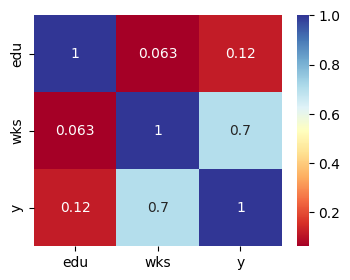

In [17]:
sns.heatmap(R, cmap='RdYlBu', annot=True) #히트맵의 색상 맵을 지정 RdYlBu, 실제 값을 표현

In [18]:
islow = DF['y'] <= 1500 #y열의 값이 1500 이하인 행동을 찾아냄
islow.value_counts(), islow.value_counts(normalize = True) #True, False 의 빈도수 계산, #상대적인 빈도수 반환

(False    1091
 True       24
 Name: y, dtype: int64,
 False    0.978475
 True     0.021525
 Name: y, dtype: float64)

In [19]:
#y열의 값이 1500인 행들이 전체 데이터에서 차지하는 비율을 나타냄
TBL = islow.value_counts(normalize=True)
TBL

False    0.978475
True     0.021525
Name: y, dtype: float64

<Axes: ylabel='y'>

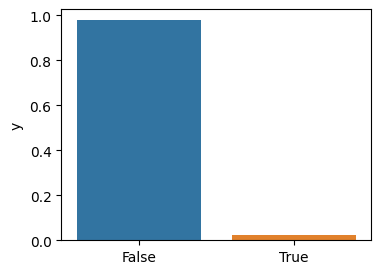

In [20]:
sns.barplot(x=TBL.index, y=TBL)

In [21]:
pd.crosstab(DF['blk'], islow, rownames=['blk'], colnames=['islow'], margins=True)

islow,False,True,All
blk,,,
0,450,3,453
1,641,21,662
All,1091,24,1115


<Axes: >

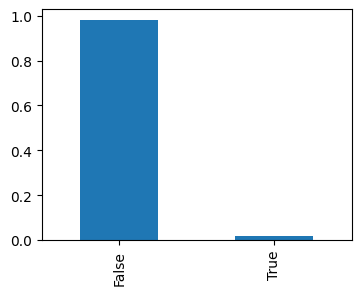

In [22]:
TBL.plot(kind='bar',  stacked=True)

In [23]:
#DF['smk']: 'smk' 열을 선택합니다.
#islow: 'y' 열의 값이 1500 이하인지 여부를 나타내는 불리언 시리즈입니다.
#rownames=['smk'], colnames=['islow']: 생성된 표의 행과 열에 대한 이름을 부여합니다.
#normalize='index': 행(인덱스) 별로 정규화(normalize)합니다. 이렇게 설정하면 각 행의 합이 1이 되도록 표가 정규화됩니다.

TBL = pd.crosstab(DF['smk'], islow, rownames=['smk'], colnames=['islow'], normalize='index')
TBL

islow,False,True
smk,,
0,0.983452,0.016548
1,0.962825,0.037175


<Axes: xlabel='smk'>

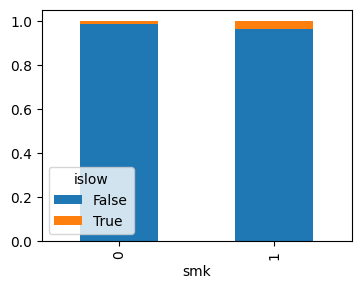

In [24]:
TBL.plot(kind='bar', stacked=True)

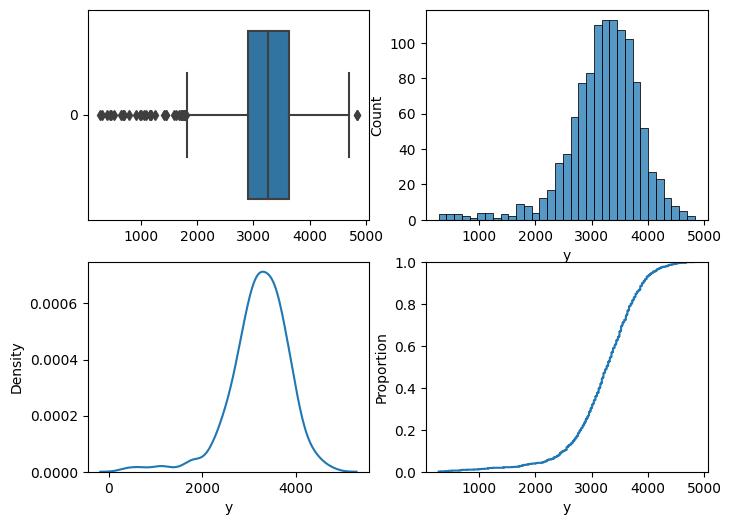

In [25]:
#크기가 8*6인치인 하위 그림의 2*2그리드 만듬, fig=도형객체, ax=하위플롯을 나타내는 axis 객체의 배열
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

#y열의 가로상자 그림
sns.boxplot(DF['y'], orient='h', ax=ax[0,0])
#y열의 히스토그램 생성
sns.histplot(DF['y'], ax=ax[0,1])
#y열의 KDE 그림 생성
sns.kdeplot(DF['y'], ax=ax[1,0])
#y열의 ECDF 그림 생성
sns.ecdfplot(DF['y'], ax=ax[1,1]);

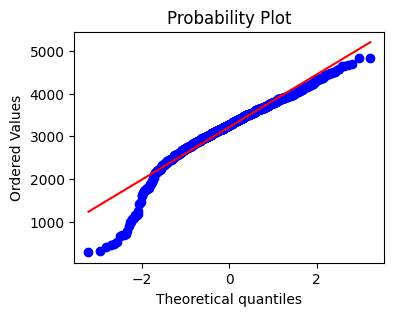

In [26]:
import scipy.stats as stats

#dist=stats.norm 은 데이터의 분위수를 정규 분포와 비교할 것을 지정
stats.probplot(DF['y'], dist=stats.norm, plot=plt);

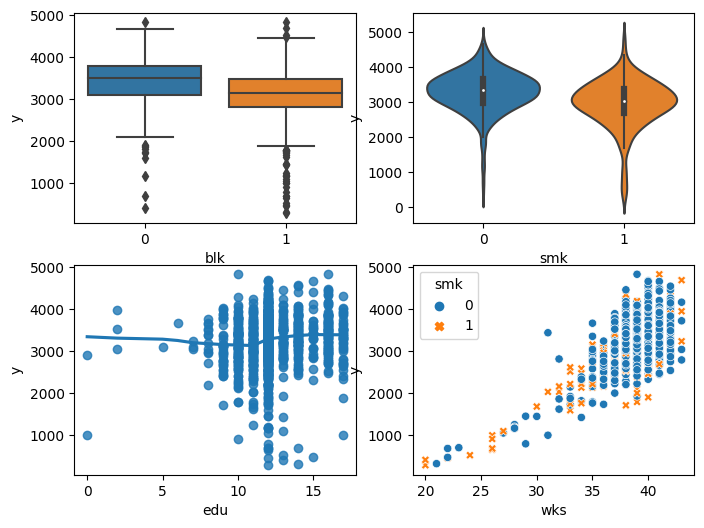

In [28]:
#fig는 전체 그림, ax는 각 서브 플롯을 나타내는 배열
fig, ax = plt.subplots(2, 2, figsize=(8,6))
#blk를 x축으로 y열을 y축으로 하는 상자 그림
sns.boxplot(data=DF, x='blk', y='y', ax=ax[0,0])
#smk열을 x축으로, y열을 y축으로
sns.violinplot(data=DF, x='smk', y='y', ax=ax[0,1])
#edu열을 x축으로, y열을 y축으로
sns.regplot(data=DF, x='edu', y='y', lowess=True, ax=ax[1,0])
sns.scatterplot(data=DF, x='wks', y='y', hue='smk', style='smk', ax=ax[1,1]);

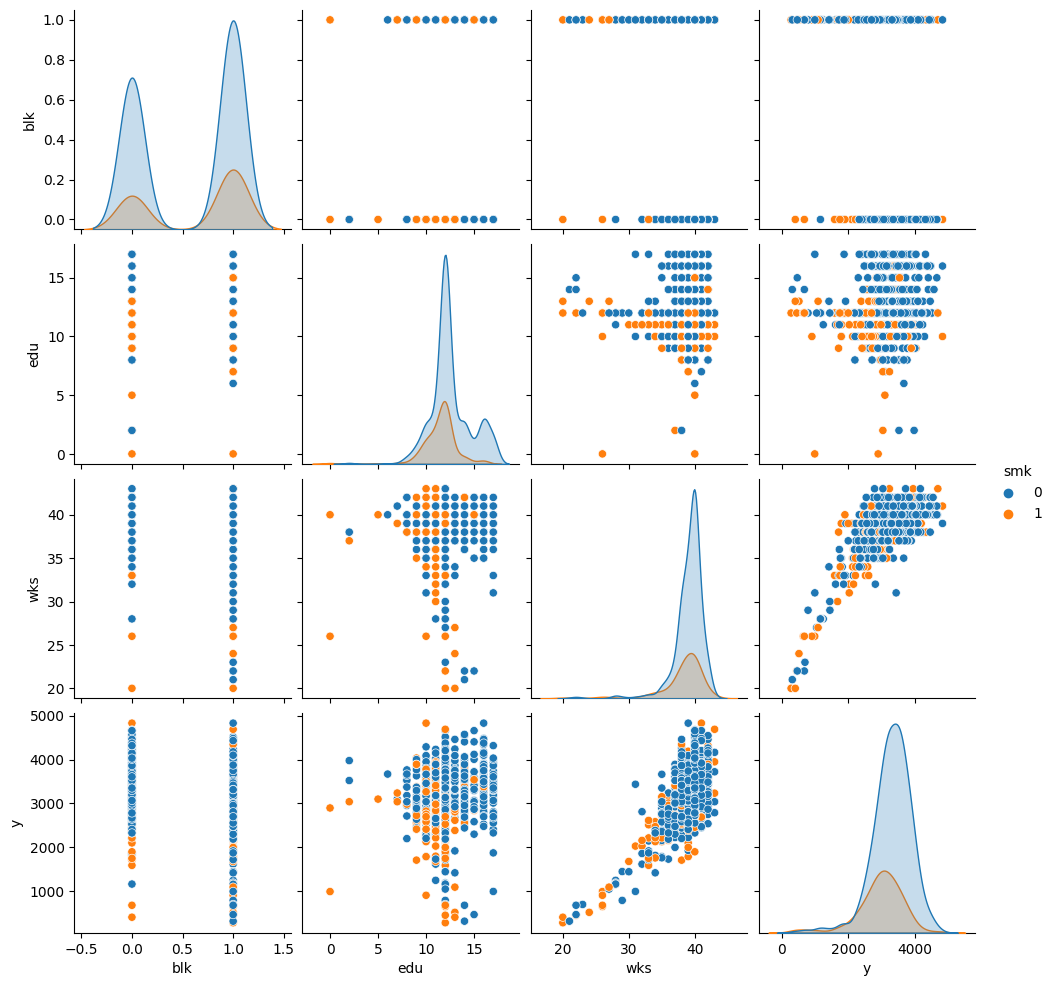

In [29]:
#숫자 데이터일때만 효과적
sns.pairplot(DF, hue='smk')

In [30]:
DFX = DF.copy().drop(['y'], axis=1)

In [31]:
DFy = DF['y'].copy()

In [38]:
from sklearn.model_selection import train_test_split, KFold
TRX, TSX, TRy, TSy = train_test_split(DF.drop(['y'],axis=1), DF['y'],
                                      test_size=0.2, random_state=1234)
TRX.shape, TSX.shape, TRy.shape, TRy.shape

((892, 4), (223, 4), (892,), (892,))